### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')
#data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
#Check for missing data 
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#Drop the column car
data = data.drop(columns=['car'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
#Divide the number accepted the coupon by total number of observations
Accepted_coupon_percentage = (len(data[data['Y'] == 1])/len(data)) 

print(f"Proportion of the total observations chose to accept the coupon: {Accepted_coupon_percentage:.2%}")


Proportion of the total observations chose to accept the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

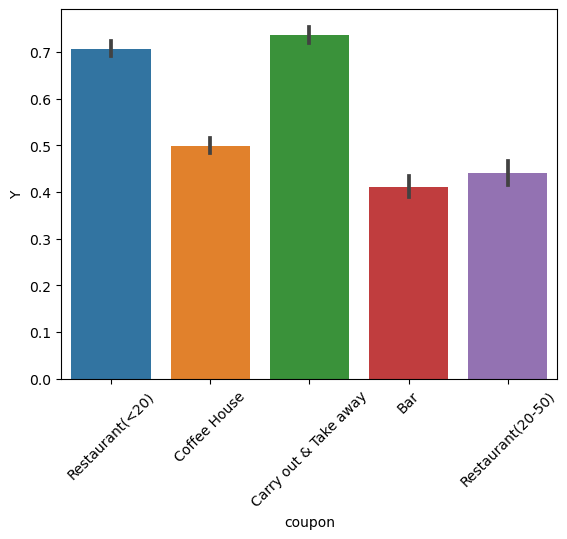

In [8]:
sns.barplot(x='coupon', y='Y', data=data)
plt.xticks(rotation=45)


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

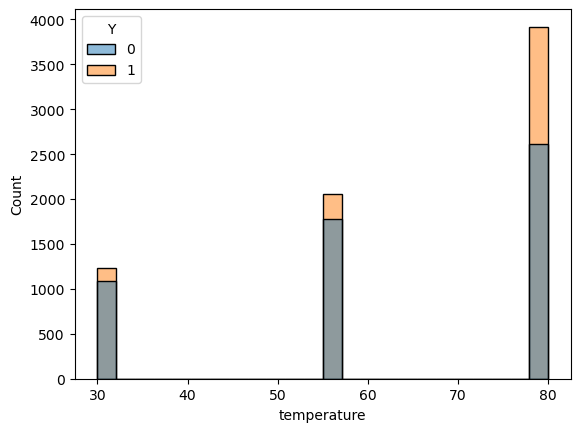

In [9]:
sns.histplot(data,x='temperature',hue='Y')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_data = data[data['coupon']=='Bar']


2. What proportion of bar coupons were accepted?


In [11]:
bar_data['Y'].value_counts()
print ("Propotions of the bar coupon accepted % : ", round(bar_data['Y'].value_counts(normalize=True)[1]*100,2))

Propotions of the bar coupon accepted % :  41.0


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
#Filter the data which meets criteria of going to bar 3 or less in a month
bar_3orless = bar_data.loc[bar_data['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean()

#who went to bars 4 or more times a month
bar_morethan3 = bar_data.loc[bar_data['Bar'].isin(['4~8','gt8'])]['Y'].mean()

print (round(bar_3orless *100,2) , "% is the acceptance rate for who went to a bar 3 or fewer times a month")
print (round(bar_morethan3 *100,2) , "is the acceptance rate for who went to 4 or more times a month")

37.06 % is the acceptance rate for who went to a bar 3 or fewer times a month
76.88 is the acceptance rate for who went to 4 or more times a month


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
#who go to bars more than once a month and are over the age of 25
bar_25_morethanonce = bar_data[((bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
     (bar_data['age'].isin(['26', '31', '50plus', '36', '41', '46'])))]

#print("Number of drivers over age 25 and go to bar more than once a month who accepted = ",  bar_25_morethanonce['Y'].sum())

#drivers other than who go to bars more than once a month and over 25 years 
bar_not_25_morethanonce = bar_data[ (~(bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_data['age'].isin(['26', '31', '50plus', '36', '41', '46']))) |
               bar_data['age'].isin({'21','below21'}) ]
#print("Number of drivers not over age 25 and go to bar more than once a month who accepted = ",  bar_not_25_morethanonce['Y'].sum())


print(round(bar_25_morethanonce['Y'].mean()*100,2) , "% is the Acceptance Rate of drivers over the age of 25 and go to bar more than once a month")
print(round(bar_not_25_morethanonce['Y'].mean()*100 ,2) , "% is the Acceptance Rate of drivers not over the age of 25 and go to bar more than once a month")
                                 

69.52 % is the Acceptance Rate of drivers over the age of 25 and go to bar more than once a month
33.5 % is the Acceptance Rate of drivers not over the age of 25 and go to bar more than once a month


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [14]:
#Get the acceptance rate of drivers with each of the criteria fulfilled
#who go to bars more than once a month
bar_more_than_once = bar_data[bar_data['Bar'].isin({'1~3', '4~8', 'gt8'})]['Y'].mean()

#who had passengers that were not a kid
bar_psngr_not_kid = bar_data[bar_data['passanger'] != 'Kid(s)']['Y'].mean()

#had occupations otherthan farming, fishing or firestry
bar_not_farm_fish_forest = bar_data[bar_data['occupation'] != 'farming, fishing, or forestry']['Y'].mean()

print(round(bar_more_than_once*100,2) , "% is the Acceptance Rate of drivers who go to bars more than once a month")
print(round(bar_psngr_not_kid*100,2) , "% is the Acceptance Rate of drivers who had passengers that were not a kid")
print(round(bar_not_farm_fish_forest*100,2), "% is the Acceptance Rate of drivers who had occupations other than farming, fishing, or forestry")


68.79 % is the Acceptance Rate of drivers who go to bars more than once a month
43.29 % is the Acceptance Rate of drivers who had passengers that were not a kid
41.0 % is the Acceptance Rate of drivers who had occupations other than farming, fishing, or forestry


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [15]:
#First Acceptance rate of drivers who go to bars more tahn once a month, had passengers taht were not a kid and not widowed

bar_morethanonce_no_kid_no_widowed = bar_data[(bar_data['Bar'].isin({'1~3', '4~8', 'gt8'}) )& (bar_data['passanger'] != 'Kid(s)') &
      (bar_data['maritalStatus'] != 'Widowed')]["Y"].mean()

# Acceptance rate of drivers who go to bars more tahn once a month and are under age 30

bar_morethanonce_under30 = bar_data[bar_data['Bar'].isin({'1~3', '4~8', 'gt8'}) & (bar_data['age'].isin({'below21','21','26'}))]["Y"].mean()

# Acceptane rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K    
cheap_rest_less_50k = bar_data[bar_data['RestaurantLessThan20'].isin({'4~8','gt8'}) &
    bar_data['income'].isin({'Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'})]["Y"].mean()

print(round(bar_morethanonce_no_kid_no_widowed*100,2), "% Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed ")
print(round(bar_morethanonce_under30*100,2), "% Acceptance rate for drivers who go to bars more than once a month and are under the age of 30")
print(round(cheap_rest_less_50k*100,2), "% Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income")


71.32 % Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
72.17 % Acceptance rate for drivers who go to bars more than once a month and are under the age of 30
45.35 % Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


    1. Acceptance rate of drivers who go to bars 4 or more times in a month is almost twice as that of those who go 3 or less times.
    2. Drivers who are below 30 and go to bars more than once a month have great probability of accepting the coupon
    3. Drivers who were not widowed do not tend to accept coupons when there is a passenger
    4. Drivers over the age of 25 and who go to bar more than once a month are twice more likely to accept the coupons than others.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [16]:
#To analyze the Coffee House data, for that create a dataframe that contains the coffee house coupons
CH_data = data[data['coupon']=='Coffee House']
CH_data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2209,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,36,Married partner,...,never,4~8,4~8,1~3,1,1,0,0,1,0
5630,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,less1,1,1,0,0,1,1
43,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
5479,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,41,Single,...,less1,less1,less1,never,1,1,0,0,1,0
3807,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,21,Married partner,...,never,1~3,1~3,less1,1,0,0,0,1,0


In [17]:
#The income group with highest acceptance rate of coffee house coupons
CH_data[CH_data['income'].isin({'Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'})]['Y'].mean()
CH_data.groupby('income')['Y'].mean().sort_values().iloc[-1:]

income
$87500 - $99999    0.557196
Name: Y, dtype: float64

In [18]:
#Get the Acceptance rate both female and male drivers
CH_female = CH_data[(CH_data['gender'] == 'Female') ]["Y"].mean()
CH_male = CH_data[(CH_data['gender'] == 'Male') ]["Y"].mean()

print(round(CH_female*100,2), "% Acceptance rate for female drivers who go to coffee house ")
print(round(CH_male*100,2), "% Acceptance rate for male drivers who go to coffee house ")



49.24 % Acceptance rate for female drivers who go to coffee house 
50.64 % Acceptance rate for male drivers who go to coffee house 


In [19]:
#Get the acceptance rate for drivers according to their marital status
#Drivers who are married or living together
CH_married_together = CH_data[CH_data['maritalStatus'].isin({'Married partner', 'Unmarried partner'}) ]["Y"].mean()
#Drivers who are single, widowed or divorced
CH_single_widowed_div = CH_data[CH_data['maritalStatus'].isin({'Single', 'Divorced', 'Widowed'}) ]["Y"].mean()

print(round(CH_married_together*100,2), "% Acceptance rate of drivers who go to coffeehouse and either married or together ")
print(round(CH_single_widowed_div*100,2), "% Acceptance rate of drivers who go to coffee house and single, widowed or divorced")


48.85 % Acceptance rate of drivers who go to coffeehouse and either married or together 
51.32 % Acceptance rate of drivers who go to coffee house and single, widowed or divorced


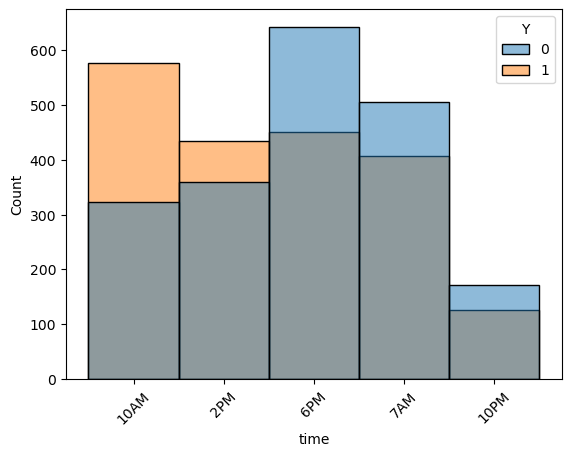

In [20]:
#Crteate a histogram with coffee house coiupons and time of the day

sns.histplot(CH_data,x=CH_data['time'],hue='Y')
plt.xticks(rotation=45)

# Show the plot
plt.show()

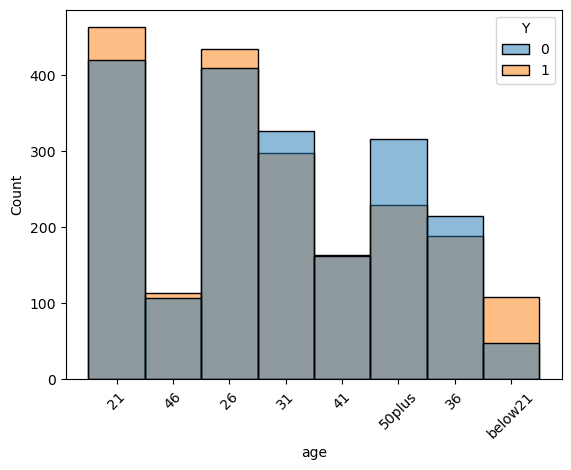

In [21]:
#Create a histogram with coffee house coupons and age of the drivers
sns.histplot(CH_data,x=CH_data['age'],hue='Y')
plt.xticks(rotation=45)

# Show the plot
plt.show()